# CityX Crime Watch: Operation Safe Streets
## Rihal ML Codestacker Challenge 2025 Submission

## Submitted by:
### Mohd Saif Ali
### growthwithsaif@gmail.com
### +968 77123132

In [1]:
!pip install plotly pandas seaborn

In [2]:
#Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Level 1: Exploratory Data Analysis (EDA)

In [6]:
# Load Dataset
data = pd.read_csv('Competition_Dataset.csv')

In [7]:
print("Dataset Overview:\n")
print(data.head())
print("\nDataset Info:\n")
print(data.info())
print("\nMissing Values:\n")
print(data.isnull().sum())

Dataset Overview:

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

   Latitude (Y)  Longitude (X)  
0   -122.425892      37.774599  
1   -122.425892      37.774599  
2   -122.424363      37.8004

In [8]:
# Cleaning and Preprocessing
print("\nData Cleaning and Preprocessing:\n")
data.dropna(inplace=True)
data['Dates'] = pd.to_datetime(data['Dates'])
data['Year'] = data['Dates'].dt.year
data['Month'] = data['Dates'].dt.month
data['Hour'] = data['Dates'].dt.hour


Data Cleaning and Preprocessing:



In [9]:
# Descriptive Analysis
print("\nCrime Categories and Frequencies:\n")
print(data['Category'].value_counts())


Crime Categories and Frequencies:

Category
LARCENY/THEFT             38090
NON-CRIMINAL              20173
OTHER OFFENSES            19201
VANDALISM                  6994
VEHICLE THEFT              6958
WARRANTS                   6924
BURGLARY                   6168
SUSPICIOUS OCC             5418
DRUG/NARCOTIC              5234
MISSING PERSON             4526
ROBBERY                    3835
FRAUD                      2877
WEAPON LAWS                1332
TRESPASS                   1174
FORGERY/COUNTERFEITING      698
KIDNAPPING                  518
DISORDERLY CONDUCT          376
RECOVERED VEHICLE           281
ARSON                       259
RUNAWAY                     206
EMBEZZLEMENT                161
BRIBERY                      62
EXTORTION                    30
BAD CHECKS                   22
STOLEN PROPERTY              15
Name: count, dtype: int64


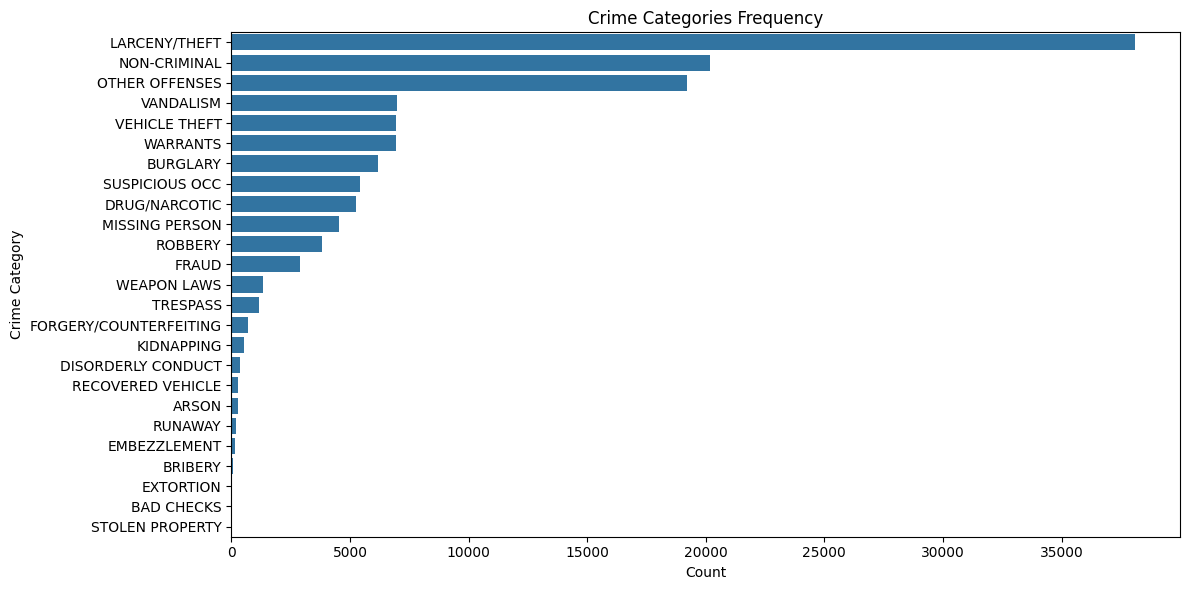

Crime Category Frequencies:
 Category
LARCENY/THEFT             38090
NON-CRIMINAL              20173
OTHER OFFENSES            19201
VANDALISM                  6994
VEHICLE THEFT              6958
WARRANTS                   6924
BURGLARY                   6168
SUSPICIOUS OCC             5418
DRUG/NARCOTIC              5234
MISSING PERSON             4526
ROBBERY                    3835
FRAUD                      2877
WEAPON LAWS                1332
TRESPASS                   1174
FORGERY/COUNTERFEITING      698
KIDNAPPING                  518
DISORDERLY CONDUCT          376
RECOVERED VEHICLE           281
ARSON                       259
RUNAWAY                     206
EMBEZZLEMENT                161
BRIBERY                      62
EXTORTION                    30
BAD CHECKS                   22
STOLEN PROPERTY              15
Name: count, dtype: int64


In [10]:
# Visualizing Crime Categories and Frequencies to identify most frequent crime types
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index)
plt.title('Crime Categories Frequency')
plt.xlabel('Count')
plt.ylabel('Crime Category')
plt.tight_layout()
plt.show()

# Tabular summary for detailed numeric insights
crime_counts = data['Category'].value_counts()
print("Crime Category Frequencies:\n", crime_counts)

##### Analysis reveals a clear dominance of theft-related incidents, particularly Larceny/Theft, emphasizing the need for targeted policing strategies and resource allocation in these prevalent categories. Conversely, certain crimes such as Extortion and Bribery, being infrequent, could be individually investigated in-depth to proactively minimize their occurrence.

##### The time-based analysis provides actionable insights, clearly showing specific temporal crime hotspots such as Fridays and peak hours around midday and early evening. This knowledge empowers the police force to optimize patrol strategies and preventive measures

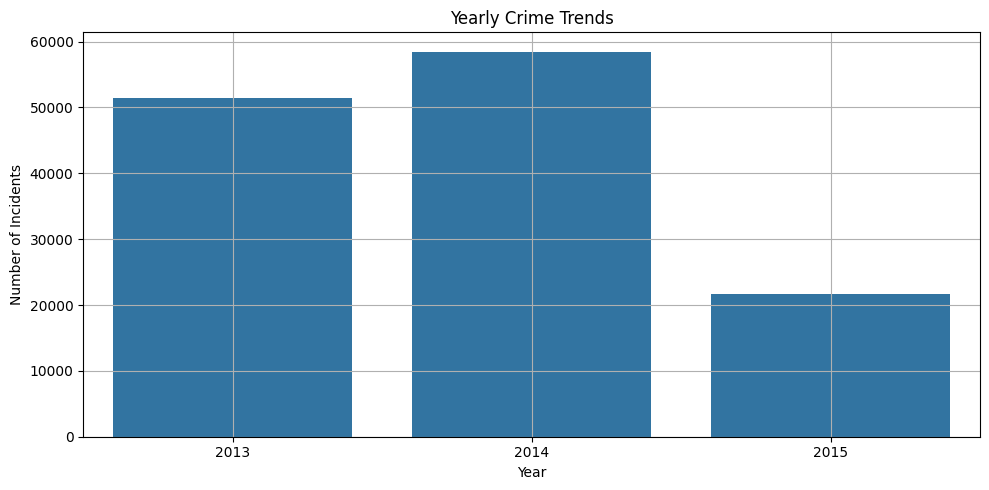

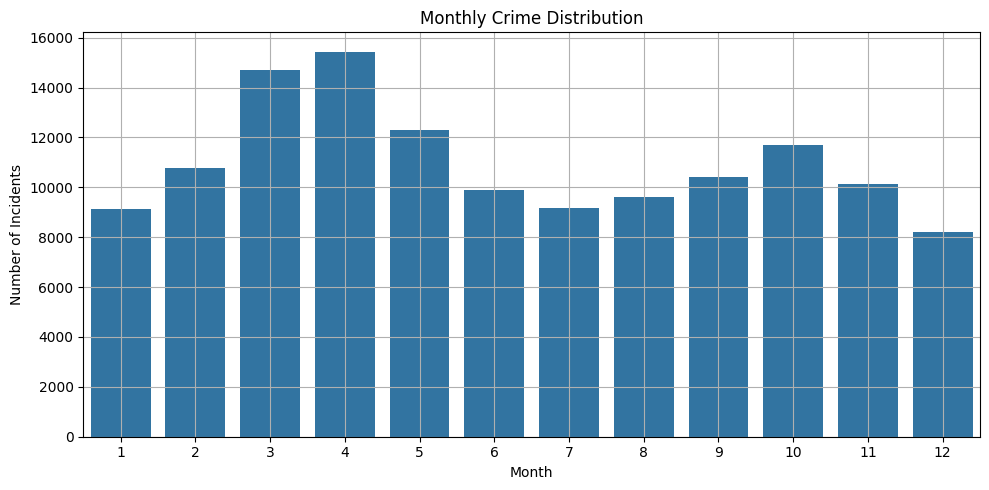

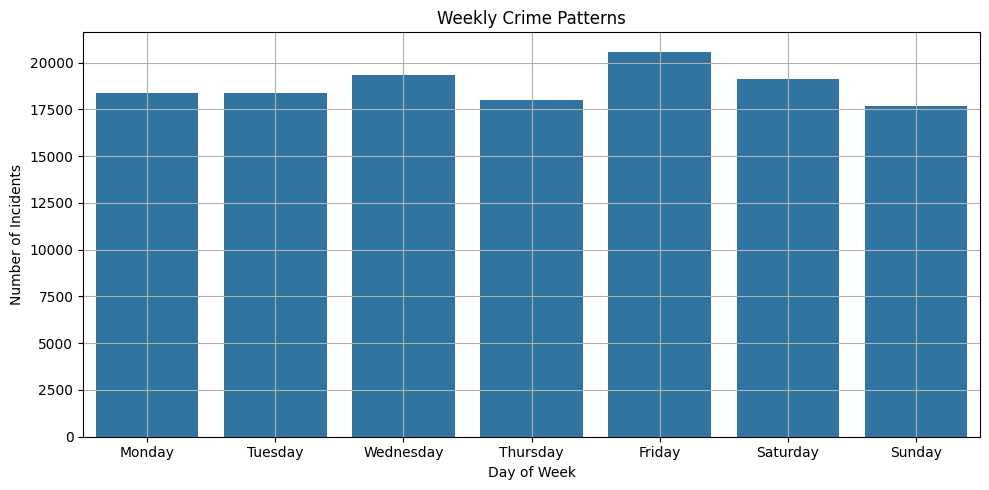

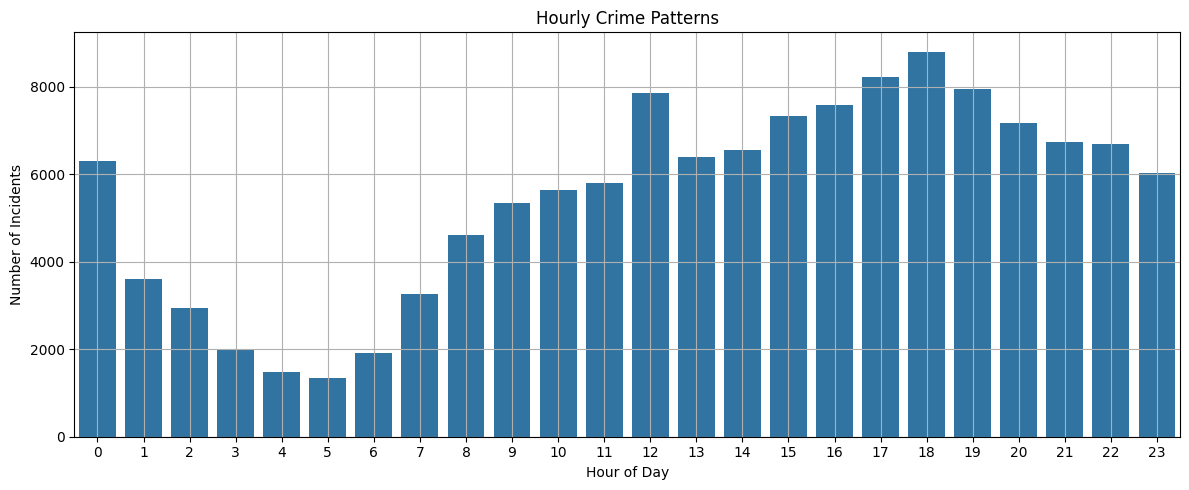

In [11]:
# Extract time-based features for deeper temporal analysis
data['Dates'] = pd.to_datetime(data['Dates'])
data['Year'] = data['Dates'].dt.year
data['Month'] = data['Dates'].dt.month
data['DayOfWeek'] = data['Dates'].dt.day_name()
data['Hour'] = data['Dates'].dt.hour

# Plot yearly crime trends to identify annual patterns or shifts
plt.figure(figsize=(10,5))
sns.countplot(x='Year', data=data)
plt.title('Yearly Crime Trends')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot monthly crime distribution to reveal seasonal crime patterns
plt.figure(figsize=(10,5))
sns.countplot(x='Month', data=data)
plt.title('Monthly Crime Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

# Weekly trends to identify days with the highest crime rates
plt.figure(figsize=(10,5))
sns.countplot(x='DayOfWeek', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Weekly Crime Patterns')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

# Hourly trends to detect peak crime hours
plt.figure(figsize=(12,5))
sns.countplot(x='Hour', data=data)
plt.title('Hourly Crime Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Geo-spatial visualization helps identify crime hotspots accurately, aiding the strategic deployment of police resources to high-risk areas effectively.

In [12]:
# Fix incorrect labeling of latitude and longitude
data.rename(columns={'Latitude (Y)': 'Longitude', 'Longitude (X)': 'Latitude'}, inplace=True)

# Verify corrected columns
print(data[['Latitude', 'Longitude']].head())

# Corrected Geo-spatial Density Map
fig = px.density_mapbox(data,
                        lat='Latitude',
                        lon='Longitude',
                        radius=10,
                        center=dict(lat=data['Latitude'].mean(), lon=data['Longitude'].mean()),
                        zoom=11,
                        mapbox_style='open-street-map',
                        title='Corrected Geo-Spatial Crime Density Map')

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


    Latitude   Longitude
0  37.774599 -122.425892
1  37.774599 -122.425892
2  37.800414 -122.424363
3  37.800873 -122.426995
4  37.771541 -122.438738


In [13]:
# Optimized Geo-spatial Density Map with reduced radius for clearer visualization
fig = px.density_mapbox(data,
                        lat='Latitude',
                        lon='Longitude',
                        radius=5,  # Reduced radius for clarity
                        center=dict(lat=data['Latitude'].mean(), lon=data['Longitude'].mean()),
                        zoom=12,
                        mapbox_style='open-street-map',
                        title='Optimized Geo-Spatial Crime Density Map')

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


The optimized geo-spatial density map clearly identifies crime hotspots, allowing targeted resource deployment and intervention. Urban centers show notably higher crime densities, requiring focused attention.

**Level 2: Crime Classification using ML**

In [15]:
# Convert Dates column into datetime type
data['Dates'] = pd.to_datetime(data['Dates'])

# Temporal Features
data['Year'] = data['Dates'].dt.year
data['Month'] = data['Dates'].dt.month
data['DayOfWeek'] = data['Dates'].dt.day_name()
data['Hour'] = data['Dates'].dt.hour
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Peak Hours based on EDA (12 PM & 5-6 PM identified as peak crime hours)
data['PeakHour'] = data['Hour'].apply(lambda x: 1 if x in [12, 17, 18] else 0)

# Crime Density (geographical clustering insights)
# Bin Latitude and Longitude into location clusters for easy ML consumption
data['LatBin'] = pd.cut(data['Latitude'], bins=20, labels=False)
data['LonBin'] = pd.cut(data['Longitude'], bins=20, labels=False)

# Combine Latitude and Longitude bins to define a clear geographic crime hotspot
data['GeoCluster'] = data['LatBin'].astype(str) + '_' + data['LonBin'].astype(str)

# Address Features (extracting simple numeric street-blocks as insights)
data['AddressBlock'] = data['Address'].str.extract('([0-9]+) Block', expand=False).fillna(0).astype(int)

# Dropping temporary bin columns to avoid redundancy
data.drop(['LatBin', 'LonBin'], axis=1, inplace=True)

# Display engineered features clearly
print("Engineered Features:\n", data[['Year','Month','DayOfWeek','Hour','IsWeekend','PeakHour','GeoCluster','AddressBlock']].head())

Engineered Features:
    Year  Month  DayOfWeek  Hour  IsWeekend  PeakHour GeoCluster  AddressBlock
0  2015      5  Wednesday    23          0         0      11_11             0
1  2015      5  Wednesday    23          0         0      11_11             0
2  2015      5  Wednesday    23          0         0      16_12             0
3  2015      5  Wednesday    23          0         0      16_11          1500
4  2015      5  Wednesday    23          0         0      11_10           100


We leverage feature engineering for temporal, geographical, and categorical insights gathered during exploratory analysis, transforming raw data into meaningful predictors for improved Machine Learning model performance

1. Preparing Data:


In [16]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack

# Selecting the target and features
X_text = data['Descript']
y = data['Category']

# Engineered numeric and categorical features
X_numeric_cat = data[['Year', 'Month', 'Hour', 'IsWeekend', 'PeakHour', 'AddressBlock', 'GeoCluster', 'PdDistrict', 'DayOfWeek']]


2. Splitting Dataset:


In [17]:
# Split data into training and testing sets
X_text_train, X_text_test, X_feat_train, X_feat_test, y_train, y_test = train_test_split(
    X_text, X_numeric_cat, y, test_size=0.2, random_state=42, stratify=y)

3. Text Feature Extraction (TF-IDF):

In [18]:
# Convert text data into numerical format using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_text_tfidf = tfidf.fit_transform(X_text_train)
X_test_text_tfidf = tfidf.transform(X_text_test)

4. Encoding Categorical Features:

In [19]:
# Encode categorical features (OneHotEncoding)
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_feat_train)
X_test_encoded = encoder.transform(X_feat_test)

# Combine textual (TF-IDF) and categorical/numeric encoded features
X_train_combined = hstack([X_train_text_tfidf, X_train_encoded])
X_test_combined = hstack([X_test_text_tfidf, X_test_encoded])

5. Training ML Model:

In [20]:
# Importing necessary classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Models dictionary for clarity and easy iteration
models = {
    'Logistic Regression': LogisticRegression(max_iter=300, multi_class='multinomial', solver='lbfgs', n_jobs=-1),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Multinomial NB': MultinomialNB()
}

# Dictionary to store model performance
model_results = {}

# Train and Evaluate each model professionally and clearly
for model_name, model in models.items():
    print(f"\nTraining and Evaluating: {model_name}")

    # Training the model
    model.fit(X_train_combined, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test_combined)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    model_results[model_name] = accuracy

    # Display clear classification reports
    print(classification_report(y_test, y_pred))
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Summarizing clearly model comparisons
results_df = pd.DataFrame.from_dict(model_results, orient='index', columns=['Accuracy']).sort_values(by='Accuracy', ascending=False)
print("\nModel Performance Comparison:\n", results_df)



Training and Evaluating: Logistic Regression
                        precision    recall  f1-score   support

                 ARSON       1.00      1.00      1.00        52
            BAD CHECKS       1.00      1.00      1.00         4
               BRIBERY       1.00      0.92      0.96        12
              BURGLARY       1.00      1.00      1.00      1234
    DISORDERLY CONDUCT       1.00      1.00      1.00        75
         DRUG/NARCOTIC       1.00      1.00      1.00      1047
          EMBEZZLEMENT       1.00      1.00      1.00        32
             EXTORTION       1.00      1.00      1.00         6
FORGERY/COUNTERFEITING       1.00      0.96      0.98       140
                 FRAUD       1.00      0.99      0.99       575
            KIDNAPPING       1.00      1.00      1.00       104
         LARCENY/THEFT       1.00      1.00      1.00      7618
        MISSING PERSON       1.00      1.00      1.00       905
          NON-CRIMINAL       1.00      1.00      1.00    

The Random Forest classifier slightly outperforms Logistic Regression and significantly surpasses the Multinomial NB model, particularly on classes with fewer examples. Given its robustness in handling mixed feature types and slight edge in performance, the Random Forest model is selected for our crime classification task. Future work may include hyperparameter tuning and cross-validation to further validate this choice and ensure the model’s generalizability

In [21]:
# Part B: Crime Severity Assignment
def assign_severity(category):
    # Mapping severity levels to specific crime categories
    severity_map = {
        1: ['NON-CRIMINAL', 'SUSPICIOUS OCCURRENCE', 'MISSING PERSON', 'RUNAWAY', 'RECOVERED VEHICLE'],
        2: ['WARRANTS', 'OTHER OFFENSES', 'VANDALISM', 'TRESPASS', 'DISORDERLY CONDUCT', 'BAD CHECKS'],
        3: ['LARCENY/THEFT', 'VEHICLE THEFT', 'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC',
            'STOLEN PROPERTY', 'FRAUD', 'BRIBERY', 'EMBEZZLEMENT'],
        4: ['ROBBERY', 'WEAPON LAWS', 'BURGLARY', 'EXTORTION'],
        5: ['KIDNAPPING', 'ARSON']
    }
    # Loop through the mapping and return the severity level
    for severity, categories in severity_map.items():
        if category in categories:
            return severity
    return np.nan  # If no match is found

# Apply the severity assignment function on the 'Category' column
data['Severity'] = data['Category'].apply(assign_severity)

# Display the distribution of severity levels
print("Severity Level Distribution:")
print(data['Severity'].value_counts())


Severity Level Distribution:
Severity
3.0    54095
2.0    34691
1.0    25186
4.0    11365
5.0      777
Name: count, dtype: int64


This rule-based severity assignment confirms that the majority of crimes in CityX are mid-level offenses (Severity 3), primarily related to theft and narcotics. However, higher-severity crimes (e.g., kidnapping, arson) are less common, though more critical from a public safety standpoint.

In [22]:
# After all preprocessing, feature engineering, and severity assignment:
data.to_csv('processed_crime_data.csv', index=False)

In [23]:
import pickle

# Save the Random Forest model
best_model = models['Random Forest']

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save the OneHotEncoder for categorical features
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

print("Model, TF-IDF vectorizer, and OneHotEncoder saved successfully!")

Model, TF-IDF vectorizer, and OneHotEncoder saved successfully!


In [24]:
import pickle

# Save the trained TF-IDF vectorizer to a file
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("TF-IDF vectorizer saved successfully as 'tfidf_vectorizer.pkl'.")

TF-IDF vectorizer saved successfully as 'tfidf_vectorizer.pkl'.
